# Problem understanding : `Brain Stroke Classifier`

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

# !pip install missingno
# !pip install  pandas_profiling
#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import pandas_profiling as pp
# !pip install pywaffle

%matplotlib inline
init_notebook_mode(connected= True)
# !pip install mlxtend

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report ,f1_score,precision_score,recall_score,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve


In [2]:
data=pd.read_csv("./brain_stroke.csv")

### `Brain Stroke Classifier`

* Attribute Information
    - gender: "Male", "Female" or "Other"
    - age: age of the patient
    - hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    - heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) ever-married: "No" or "Yes"
    - worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"
    - avgglucoselevel: average glucose level in blood
    - bmi: body mass index
    - smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    - stroke: 1 if the patient had a stroke or 0 if not
    
More Information
* For BMI levels:
    - below 18.5 : you're in the underweight range
    - between 18.5 and 24.9 : you're in the healthy weight range
    - between 25 and 29.9 : you're in the overweight range
    - between 30 and 39.9 : you're in the obese range
* For glucose levels:
    - A fasting blood sugar level of 99 mg/dL or lower is normal
    - 100 to 125 mg/dL indicates you have prediabetes
    - 126 mg/dL or higher indicates you have diabetes

Numbers of columns in data set

In [3]:
print(f"We have {len(data.columns)} columns")
print(f"Include: ",data.columns.to_list())

We have 11 columns
Include:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [4]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# 2. Preprocessing data

In [5]:
cols_need_replace=["hypertension","heart_disease","stroke"] 

In [6]:
for col in cols_need_replace:
    data[col]=data[col].replace({0:"No",1:"Yes"}) # convert 0 to "No" and 1:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
3,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
4,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes


In [7]:
print("Statistics of categorical features")
data.describe(exclude=np.number)

Statistics of categorical features


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,4981,4981,4981,4981,4981,4981,4981,4981
unique,2,2,2,2,4,2,4,2
top,Female,No,No,Yes,Private,Urban,never smoked,No
freq,2907,4502,4706,3280,2860,2532,1838,4733


In [8]:
print("Statistics numerical_features")
data.describe(include=np.number)

Statistics numerical_features


,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


## Checking null features

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   object 
dtypes: float64(3), object(8)
memory usage: 428.2+ KB


In [10]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

This dataset have not null values

## Check duplicated values

In [11]:

data[data.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# 3 Exploring Data Analysis

In [12]:
target_feature="stroke"

In [13]:
df=data.copy()


In [14]:
categorical_col=[col for col in df.select_dtypes(include=["object"]).columns.to_list() if col !=target_feature] # Extrac categorical columns in dataset

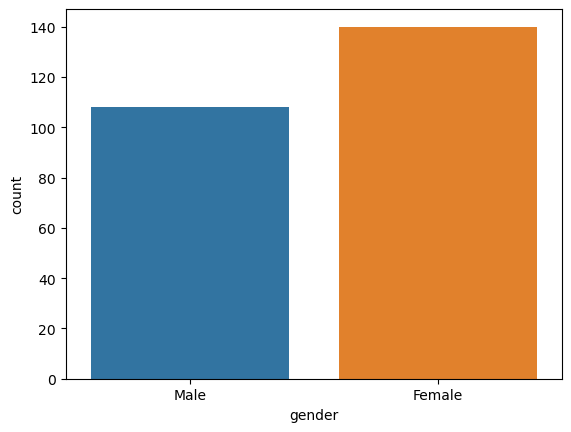

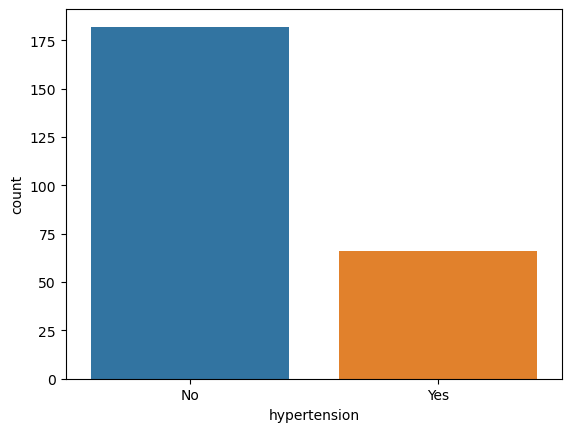

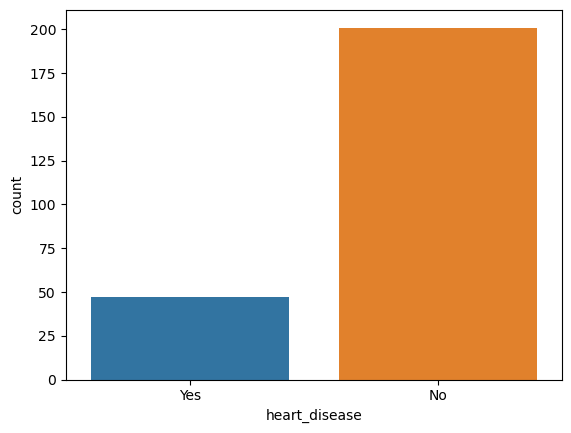

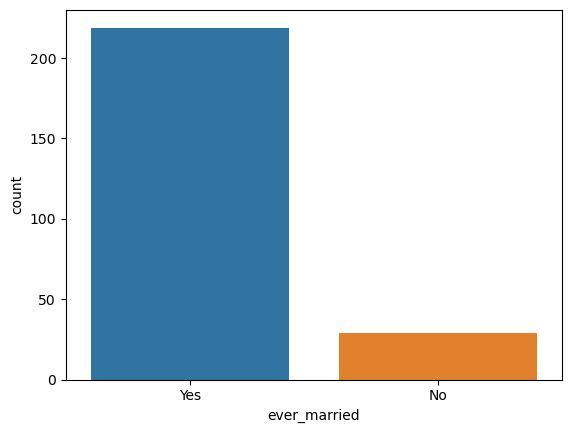

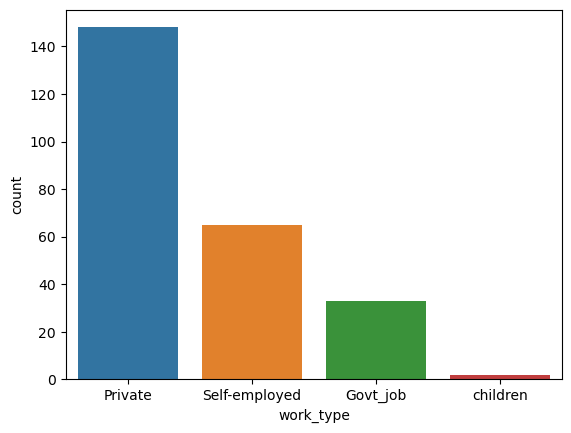

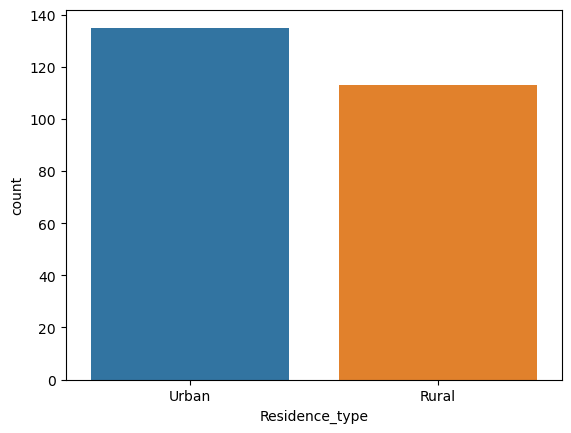

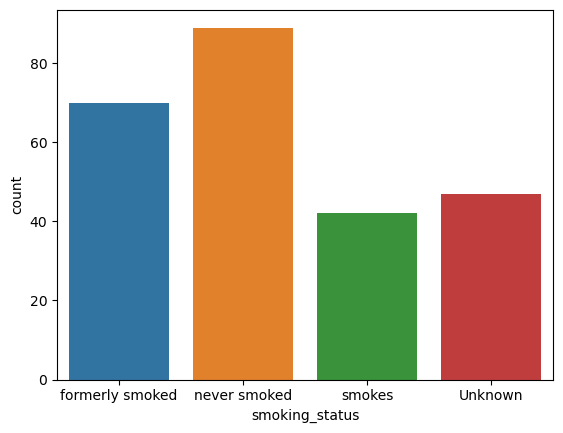

In [15]:
for col in categorical_col:
    sns.countplot(data=df[df["stroke"]=="Yes"],x=col)
    plt.show()

In [16]:
numerical_cols=df.select_dtypes(include=np.number).columns.to_list()

In [17]:

def Viz_NumericalFeature(data,feature):
  f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.2,0.8)})
  f.set_figheight(6)
  f.set_figwidth(6)
  sns.boxplot(data=data,x=feature,ax=ax_box)
  sns.histplot(data=data,x=feature,ax=ax_hist,kde=True,hue="stroke")
  plt.show()


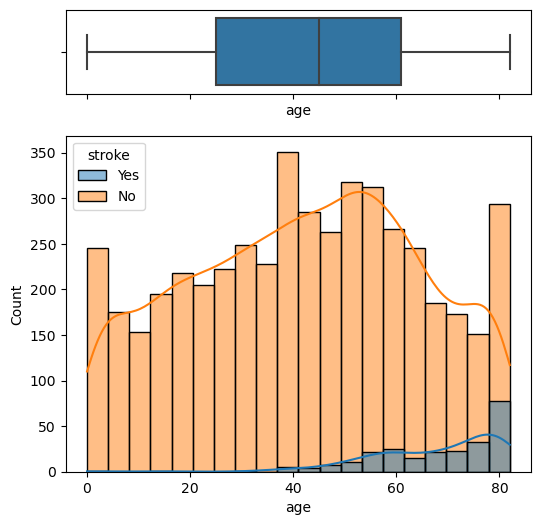

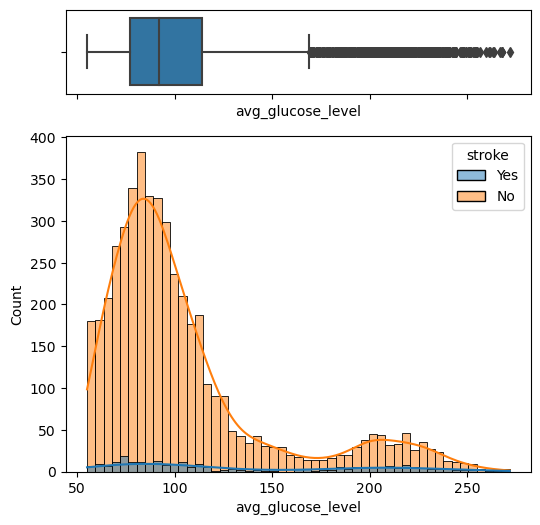

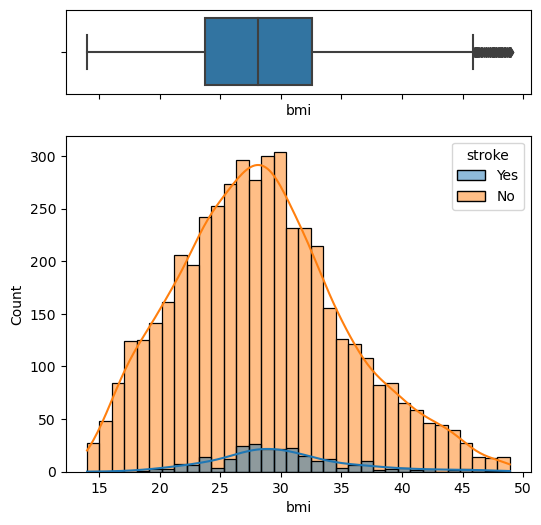

In [18]:
for col in numerical_cols:
    Viz_NumericalFeature(df,col)

Check outlier

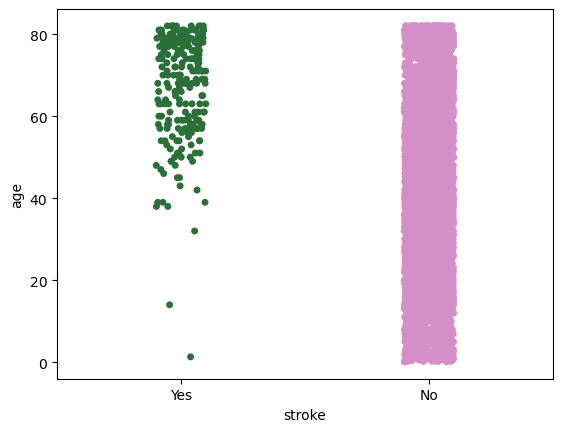

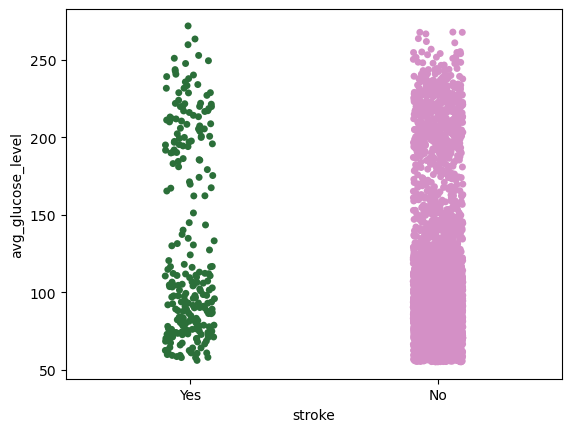

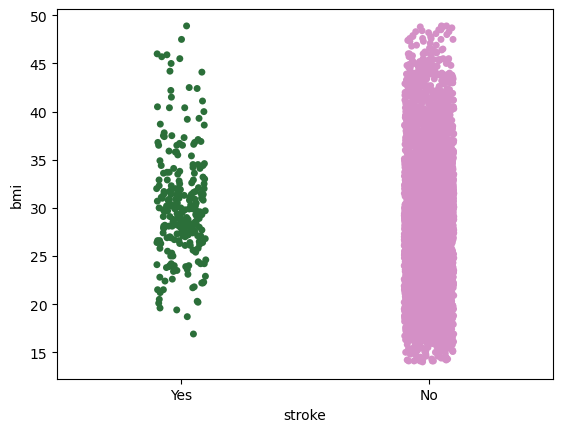

In [19]:
for col in numerical_cols:
    sns.stripplot(y=col, x ="stroke", data = data, palette='cubehelix')
    plt.show()

# Encoding categorical

In [20]:
categorical_cols=df.select_dtypes(include=["object"]).columns.to_list()


In [21]:
binary_encoder_cols=[col for col in categorical_cols if len(df[col].unique())==2]

In [22]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
for col in binary_encoder_cols:
    df[col]=lb.fit_transform(df[col])

In [23]:
"Residence_type" in categorical_cols

True

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in categorical_cols:
    if col not in binary_encoder_cols:
        df[col]=le.fit_transform(df[col])

In [25]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


Normalization

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dict_cs={}
for col in numerical_cols:
    sc=sc.fit(df[[col]])
    df[col]=sc.transform(df[[col]])
    dict_cs[col]=sc
    

In [27]:
numerical_cols

['age', 'avg_glucose_level', 'bmi']

In [28]:
print(binary_encoder_cols)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']


In [29]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
for col in binary_encoder_cols:
    df[col]=lb.fit_transform(df[col])

In [30]:
data[["age"]][:1]

,age
0,67.0


In [31]:
dict_cs["age"].transform(data[["age"]][:])

array([[5.67055425],
       [7.585196  ],
       [3.01951183],
       ...,
       [2.43039129],
       [1.69399062],
       [7.585196  ]])

In [32]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.040584,0,1,1,1,1,2.723411,1.193238,1,1
1,1,1.614270,0,1,1,1,0,-0.000523,0.589390,2,1
2,0,0.246250,0,0,1,1,1,1.448529,0.869222,3,1
3,0,1.570141,1,0,1,2,0,1.512650,-0.662492,2,1
4,1,1.658400,0,0,1,1,1,1.780895,0.073909,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,-0.106788,0,0,0,1,0,-0.794162,0.191733,1,0
4977,1,-0.150917,0,0,1,1,1,1.890500,0.383197,3,0
4978,0,0.069731,1,0,1,0,0,-0.242364,0.486294,3,0
4979,1,-0.150917,0,0,1,1,0,-0.488199,0.221189,3,0


In [33]:
dict_cs["age"].transform(np.array([[9]]))

array([[-2.87169355]])

<AxesSubplot:>

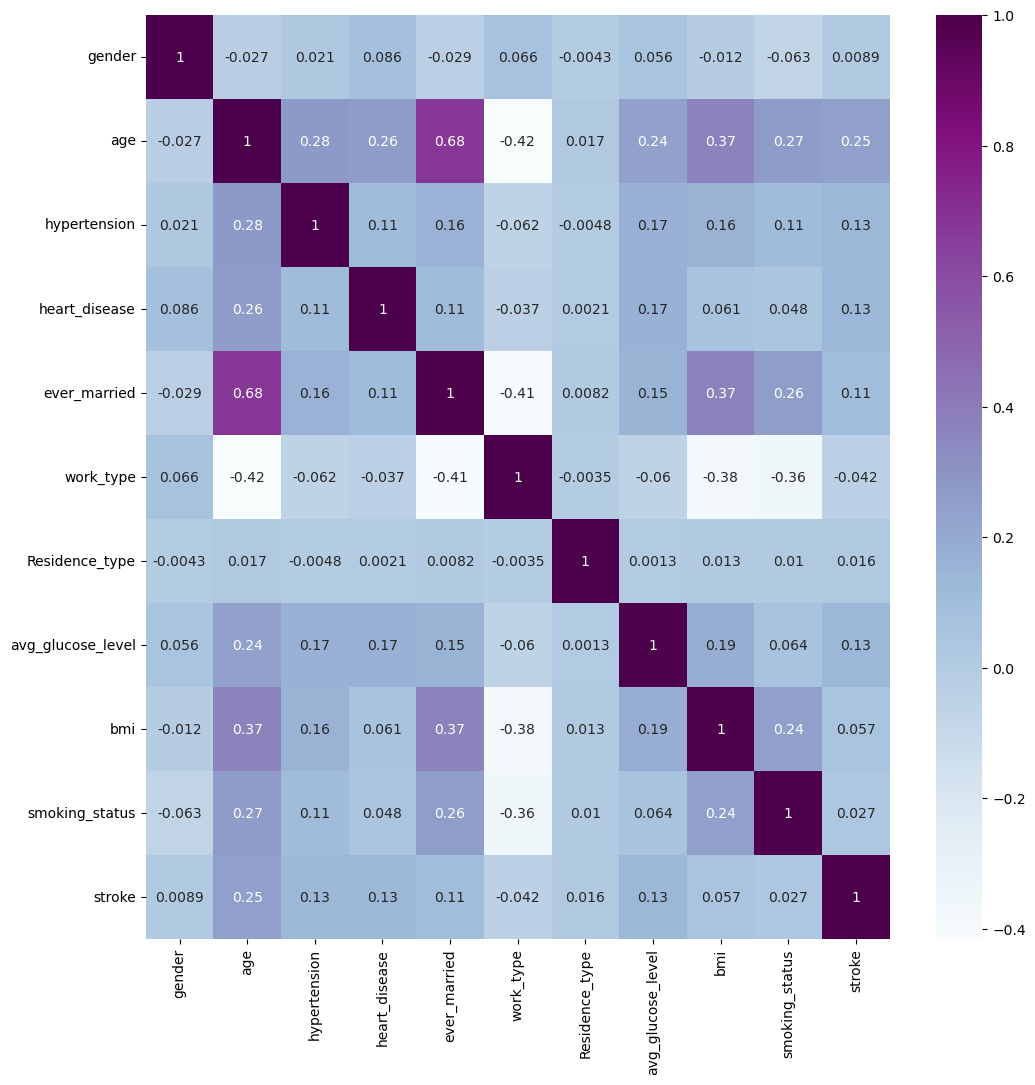

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

In [35]:
feature_selection=[col for col,value in df.corr()["stroke"].items() if value>0.05]

In [36]:
data[feature_selection]

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,67.0,No,Yes,Yes,228.69,36.6,Yes
1,80.0,No,Yes,Yes,105.92,32.5,Yes
2,49.0,No,No,Yes,171.23,34.4,Yes
3,79.0,Yes,No,Yes,174.12,24.0,Yes
4,81.0,No,No,Yes,186.21,29.0,Yes
...,...,...,...,...,...,...,...
4976,41.0,No,No,No,70.15,29.8,No
4977,40.0,No,No,Yes,191.15,31.1,No
4978,45.0,Yes,No,Yes,95.02,31.8,No
4979,40.0,No,No,Yes,83.94,30.0,No


In [37]:
final_data=df[feature_selection]
final_data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,1.040584,0,1,1,2.723411,1.193238,1
1,1.614270,0,1,1,-0.000523,0.589390,1
2,0.246250,0,0,1,1.448529,0.869222,1
3,1.570141,1,0,1,1.512650,-0.662492,1
4,1.658400,0,0,1,1.780895,0.073909,1
...,...,...,...,...,...,...,...
4976,-0.106788,0,0,0,-0.794162,0.191733,0
4977,-0.150917,0,0,1,1.890500,0.383197,0
4978,0.069731,1,0,1,-0.242364,0.486294,0
4979,-0.150917,0,0,1,-0.488199,0.221189,0


# Handling imbalance data 

In [38]:
fig=px.pie(df,values=df[target_feature].value_counts(),
           names=["No stroke","stroke"],title="<b>Percentage of People Having Strokes",
           hole=.5,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=20)
fig.show()

In [39]:
X=final_data.drop(columns=target_feature,axis=1)

In [40]:
X

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,1.040584,0,1,1,2.723411,1.193238
1,1.614270,0,1,1,-0.000523,0.589390
2,0.246250,0,0,1,1.448529,0.869222
3,1.570141,1,0,1,1.512650,-0.662492
4,1.658400,0,0,1,1.780895,0.073909
...,...,...,...,...,...,...
4976,-0.106788,0,0,0,-0.794162,0.191733
4977,-0.150917,0,0,1,1.890500,0.383197
4978,0.069731,1,0,1,-0.242364,0.486294
4979,-0.150917,0,0,1,-0.488199,0.221189


In [41]:
y=final_data["stroke"]

In [42]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)

In [43]:
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 3627), (1, 4121)]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [46]:
forest_params = [{'n_estimators':[100,150,200,300,400,450],'max_depth': list(range(10, 15)), 'max_features': list(range(0,14)),"bootstrap":[True,False]}]

In [47]:
from sklearn.model_selection import GridSearchCV
rfc_cv=GridSearchCV(estimator=rfc,param_grid=forest_params,cv=5,verbose=2,scoring='accuracy')
# rfc_cv.fit(X_train,y_train)


In [48]:
def train_and_report_models(model,X,y,X_total_test,y_total_test):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    print("Accuracy on Train data", accuracy_score(y_pred_train,y_train))
    
    print("Accuracy on Test data", accuracy_score(y_pred_test,y_test))
    
    print("Classification report on test data")
    print(classification_report(y_pred_test,y_test))
    y_pred=model.predict(X_total_test)
    mt_confusion=confusion_matrix(y_true=y_total_test,y_pred=y_pred)
    sns.heatmap(mt_confusion,annot=True,fmt=".1f",linewidth=10)
    plt.show()
    

In [49]:
best_rfc=RandomForestClassifier(bootstrap=False, max_depth=12, max_features=2,
                       n_estimators=300, random_state=42)

In [50]:
X.shape

(4981, 6)

Accuracy on Train data 0.9851565020974508
Accuracy on Test data 0.9574193548387097
Classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       719
           1       0.98      0.94      0.96       831

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



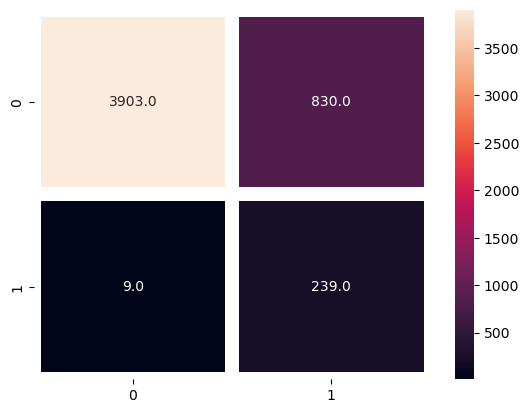

In [51]:
train_and_report_models(best_rfc,X_resampled,y_resampled,X,y)

In [52]:
# # Model Deployment (Model Saved and Load)
# import dill
# filename = "rfc_reg_model.dill"
# with open(filename, "wb") as f:
#     dill.dump(best_rfc, f)
#     print(f"Finish saving models in dill")

k= 1
Accuracy on Train data 1.0
Accuracy on Test data 0.984516129032258
Classification report on test data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       743
           1       0.99      0.98      0.99       807

    accuracy                           0.98      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.98      0.98      0.98      1550



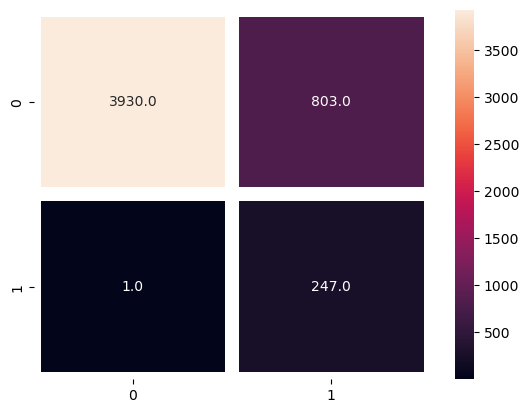

k= 2
Accuracy on Train data 1.0
Accuracy on Test data 0.984516129032258
Classification report on test data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       743
           1       0.99      0.98      0.99       807

    accuracy                           0.98      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.98      0.98      0.98      1550



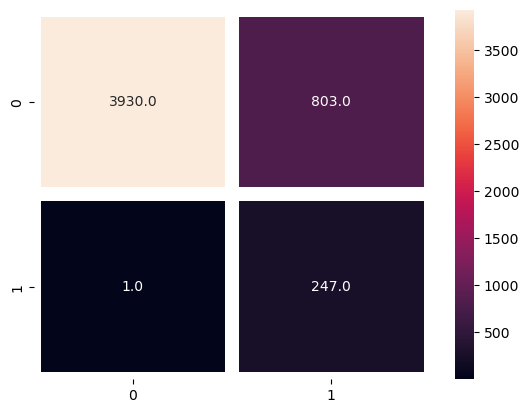

k= 3
Accuracy on Train data 1.0
Accuracy on Test data 0.9748387096774194
Classification report on test data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       726
           1       0.99      0.96      0.98       824

    accuracy                           0.97      1550
   macro avg       0.97      0.98      0.97      1550
weighted avg       0.98      0.97      0.97      1550



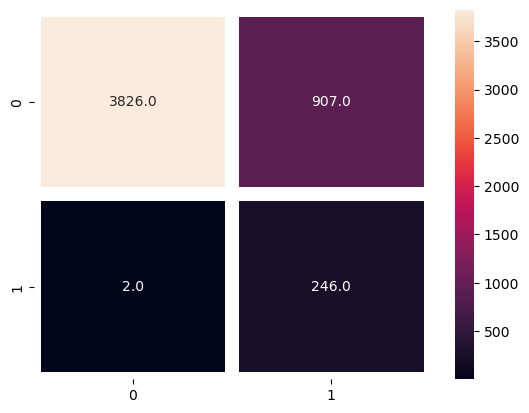

k= 4
Accuracy on Train data 1.0
Accuracy on Test data 0.9774193548387097
Classification report on test data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       730
           1       0.99      0.97      0.98       820

    accuracy                           0.98      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.98      0.98      0.98      1550



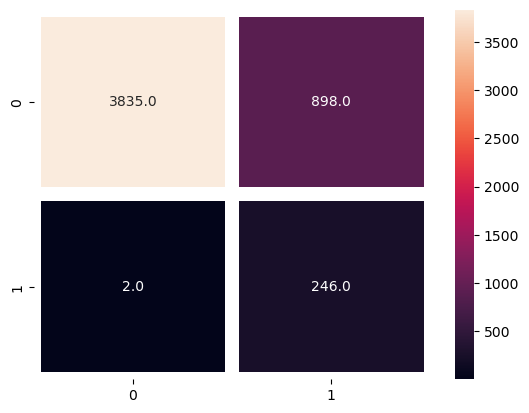

k= 5
Accuracy on Train data 1.0
Accuracy on Test data 0.967741935483871
Classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       715
           1       0.99      0.95      0.97       835

    accuracy                           0.97      1550
   macro avg       0.97      0.97      0.97      1550
weighted avg       0.97      0.97      0.97      1550



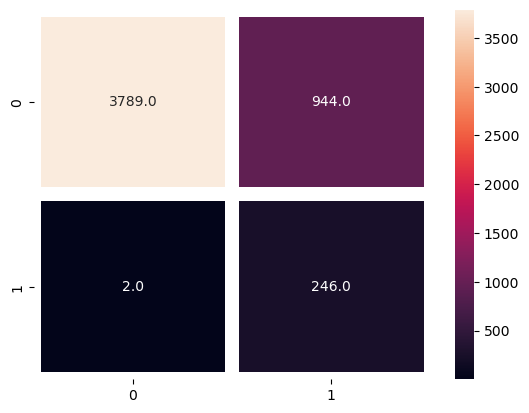

k= 6
Accuracy on Train data 1.0
Accuracy on Test data 0.9664516129032258
Classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       713
           1       0.99      0.95      0.97       837

    accuracy                           0.97      1550
   macro avg       0.97      0.97      0.97      1550
weighted avg       0.97      0.97      0.97      1550



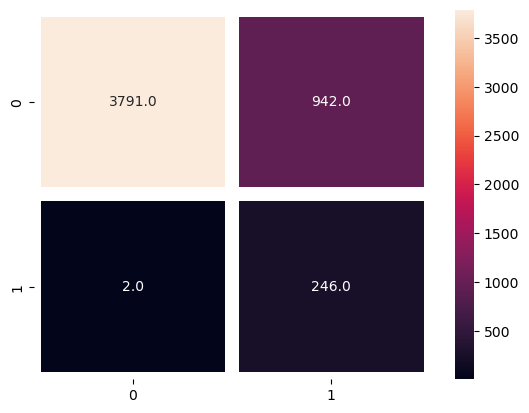

k= 7
Accuracy on Train data 1.0
Accuracy on Test data 0.9625806451612903
Classification report on test data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       707
           1       0.99      0.94      0.96       843

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



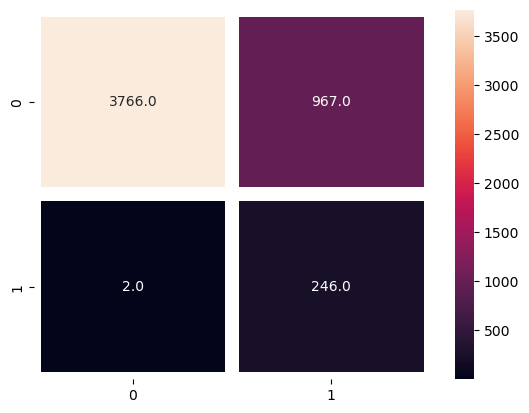

k= 8
Accuracy on Train data 1.0
Accuracy on Test data 0.9625806451612903
Classification report on test data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       707
           1       0.99      0.94      0.96       843

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



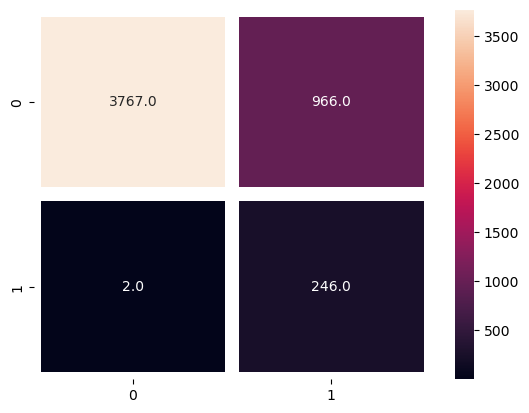

k= 9
Accuracy on Train data 1.0
Accuracy on Test data 0.9612903225806452
Classification report on test data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       705
           1       0.99      0.94      0.96       845

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



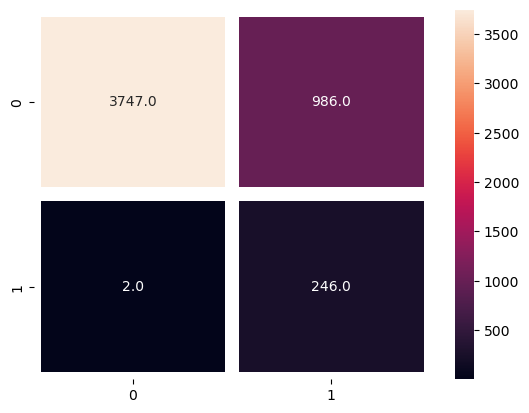

k= 10
Accuracy on Train data 1.0
Accuracy on Test data 0.9574193548387097
Classification report on test data
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       701
           1       0.99      0.93      0.96       849

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



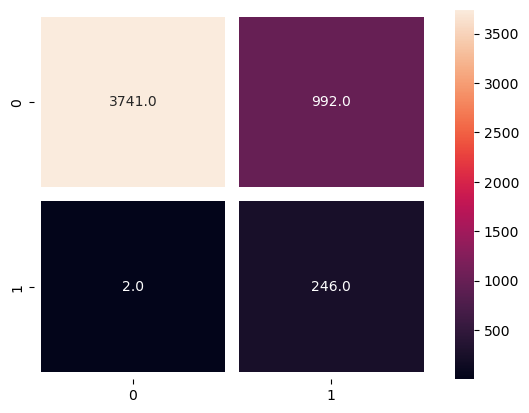

k= 11
Accuracy on Train data 1.0
Accuracy on Test data 0.9567741935483871
Classification report on test data
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       700
           1       0.99      0.93      0.96       850

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



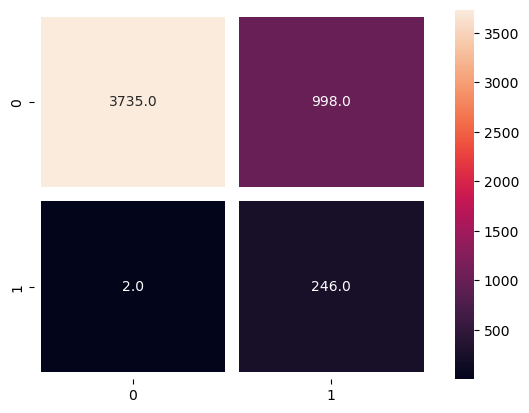

k= 12
Accuracy on Train data 1.0
Accuracy on Test data 0.9574193548387097
Classification report on test data
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       701
           1       0.99      0.93      0.96       849

    accuracy                           0.96      1550
   macro avg       0.96      0.96      0.96      1550
weighted avg       0.96      0.96      0.96      1550



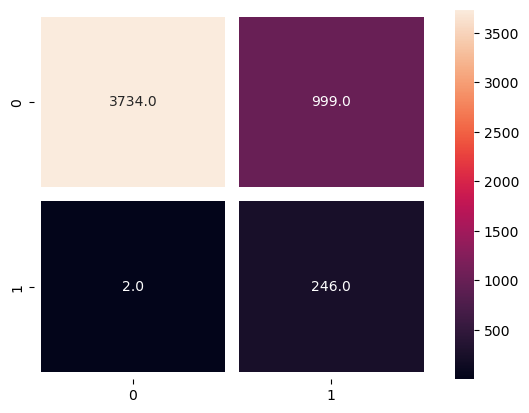

k= 13
Accuracy on Train data 1.0
Accuracy on Test data 0.9516129032258065
Classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       692
           1       0.99      0.92      0.95       858

    accuracy                           0.95      1550
   macro avg       0.95      0.96      0.95      1550
weighted avg       0.95      0.95      0.95      1550



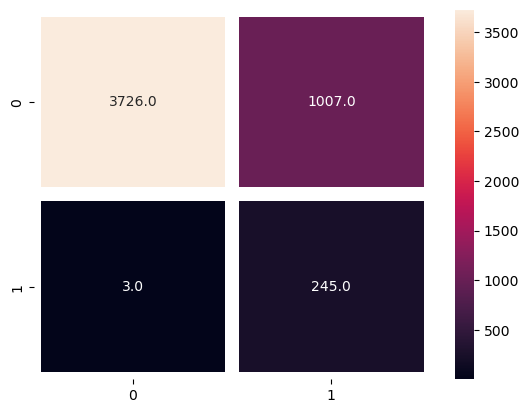

k= 14
Accuracy on Train data 1.0
Accuracy on Test data 0.9509677419354838
Classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       693
           1       0.99      0.92      0.95       857

    accuracy                           0.95      1550
   macro avg       0.95      0.95      0.95      1550
weighted avg       0.95      0.95      0.95      1550



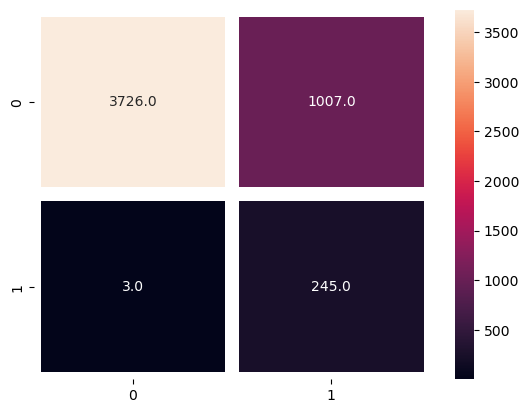

k= 15
Accuracy on Train data 1.0
Accuracy on Test data 0.9496774193548387
Classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       691
           1       0.99      0.92      0.95       859

    accuracy                           0.95      1550
   macro avg       0.95      0.95      0.95      1550
weighted avg       0.95      0.95      0.95      1550



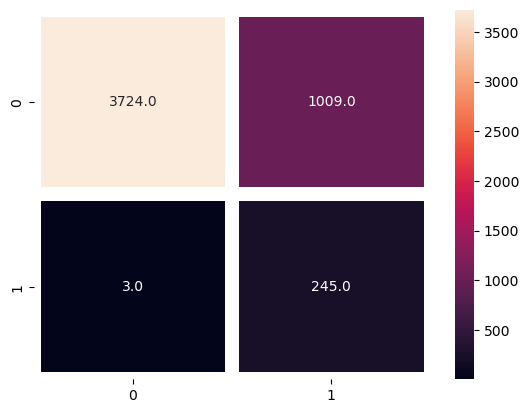

k= 16
Accuracy on Train data 1.0
Accuracy on Test data 0.9483870967741935
Classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       689
           1       0.99      0.92      0.95       861

    accuracy                           0.95      1550
   macro avg       0.95      0.95      0.95      1550
weighted avg       0.95      0.95      0.95      1550



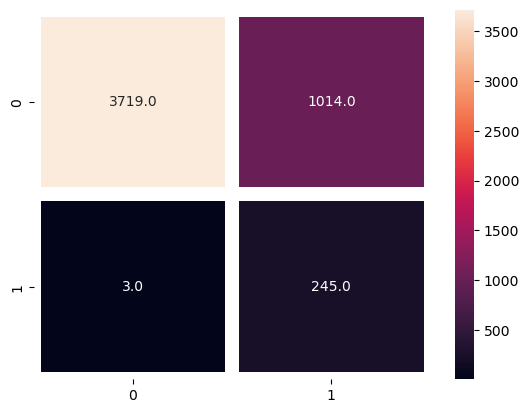

k= 17
Accuracy on Train data 1.0
Accuracy on Test data 0.9458064516129032
Classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       685
           1       0.99      0.91      0.95       865

    accuracy                           0.95      1550
   macro avg       0.94      0.95      0.95      1550
weighted avg       0.95      0.95      0.95      1550



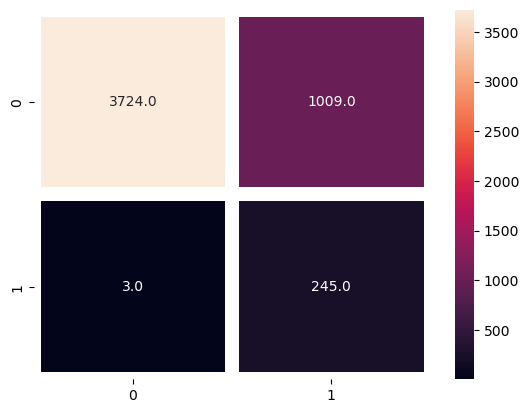

k= 18
Accuracy on Train data 1.0
Accuracy on Test data 0.9451612903225807
Classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       684
           1       0.99      0.91      0.95       866

    accuracy                           0.95      1550
   macro avg       0.94      0.95      0.94      1550
weighted avg       0.95      0.95      0.95      1550



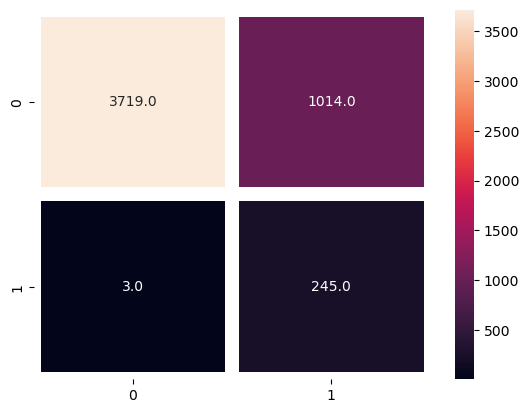

k= 19
Accuracy on Train data 1.0
Accuracy on Test data 0.944516129032258
Classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       683
           1       0.99      0.91      0.95       867

    accuracy                           0.94      1550
   macro avg       0.94      0.95      0.94      1550
weighted avg       0.95      0.94      0.94      1550



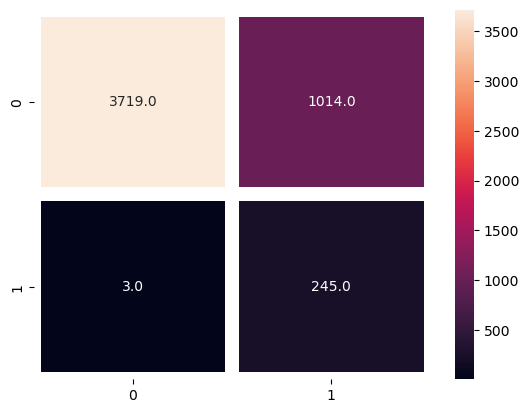

In [54]:
for k in range(1,20):
    print("k=",k)
    KNN= KNeighborsClassifier(n_neighbors=k,weights="distance",algorithm="auto",metric="minkowski")
    train_and_report_models(KNN,X_resampled,y_resampled,X,y)

Accuracy on Train data 1.0
Accuracy on Test data 0.9419354838709677
Classification report on test data
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       681
           1       0.99      0.91      0.95       869

    accuracy                           0.94      1550
   macro avg       0.94      0.95      0.94      1550
weighted avg       0.95      0.94      0.94      1550



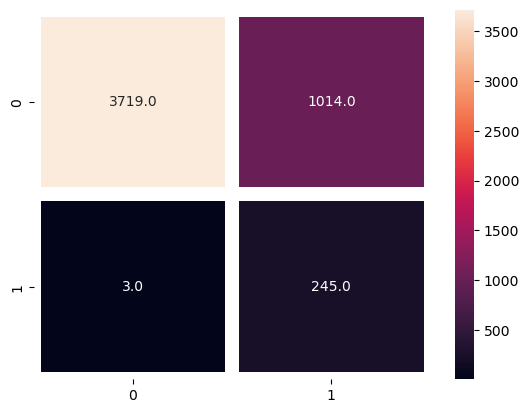

Finish saving models in dill


In [ ]:
import dill
KNN= KNeighborsClassifier(n_neighbors=50,weights="distance",algorithm="auto",metric="minkowski")
train_and_report_models(KNN,X_resampled,y_resampled,X,y)
filename = "KNN_model.dill"
with open(filename, "wb") as f:
    dill.dump(best_rfc, f)
    print(f"Finish saving models in dill")

Accuracy on Train data 0.8410777670216198
Accuracy on Test data 0.8393548387096774
Classification report on test data
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       724
         1.0       0.86      0.83      0.85       826

    accuracy                           0.84      1550
   macro avg       0.84      0.84      0.84      1550
weighted avg       0.84      0.84      0.84      1550



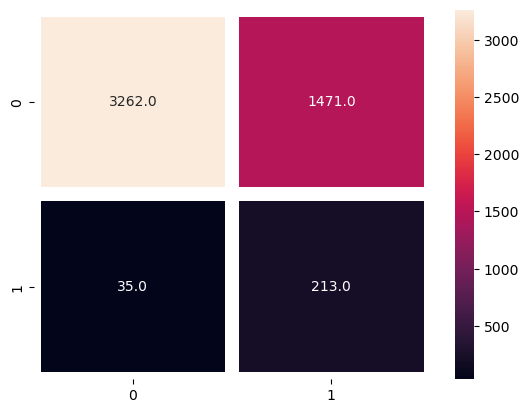

In [ ]:
LR=LogisticRegression()
train_and_report_models(LR,X_resampled,y_resampled,X,y)


Accuracy on Train data 1.0
Accuracy on Test data 0.9509677419354838
Classification report on test data
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       743
         1.0       0.96      0.95      0.95       807

    accuracy                           0.95      1550
   macro avg       0.95      0.95      0.95      1550
weighted avg       0.95      0.95      0.95      1550



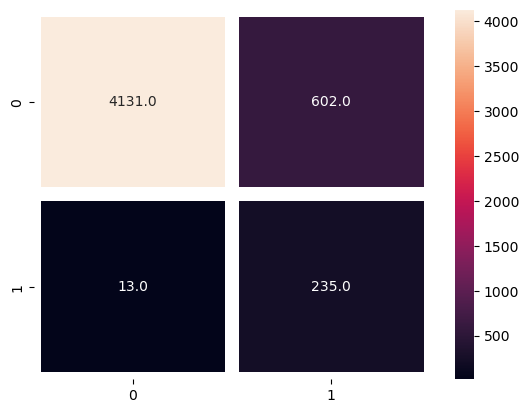

In [ ]:
Dtc=DecisionTreeClassifier()
train_and_report_models(Dtc,X_resampled,y_resampled,X,y)


In [55]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
# grid_search.fit(X_resampled,y_resampled)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [ ]:
grid_search.best_score_

0.9960411336947891

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

In [56]:
ClassifierXgboost=XGBClassifier(learning_rate= 0.1, max_depth= 9, n_estimators=180)

Accuracy on Train data 0.9990319457889641
Accuracy on Test data 0.967741935483871
Classification report on test data
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       737
           1       0.98      0.96      0.97       813

    accuracy                           0.97      1550
   macro avg       0.97      0.97      0.97      1550
weighted avg       0.97      0.97      0.97      1550



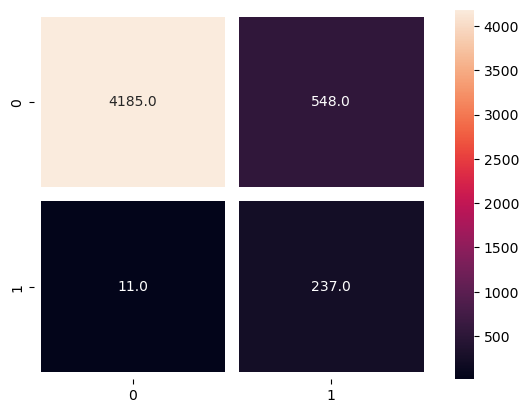

In [57]:
train_and_report_models(ClassifierXgboost,X_resampled,y_resampled,X,y)


In [ ]:
import dill
filename = "ClassifierXgboost_model.dill"
with open(filename, "wb") as f:
    dill.dump(ClassifierXgboost, f)
    print(f"Finish saving models in dill")

Finish saving models in dill


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

bagging = BaggingClassifier(n_estimators=200, max_features=5,random_state=0)
balanced_bagging = BalancedBaggingClassifier(n_estimators=50,random_state=0)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)

y_pred_bc = bagging.predict(X_test)
y_pred_bbc = balanced_bagging.predict(X_test)

In [162]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

In [165]:
print("Bagging classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bc):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_bc):.2f}"
)
print("Balanced Bagging classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bbc):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_bbc):.2f}"
)

Bagging classifier performance:
Balanced accuracy: 0.51 - Geometric mean 0.11
Balanced Bagging classifier performance:
Balanced accuracy: 0.77 - Geometric mean 0.77


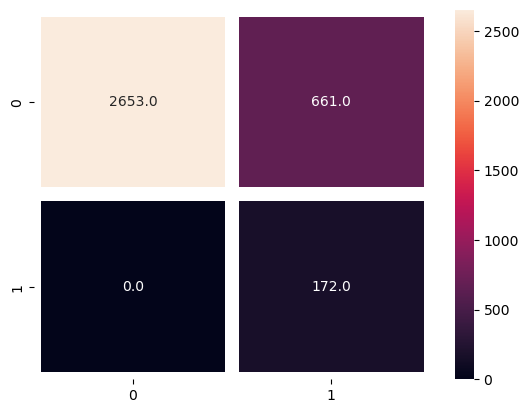

In [166]:
y_pred_bbctrain = balanced_bagging.predict(X_train)

mt_confusion=confusion_matrix(y_true=y_train,y_pred=y_pred_bbctrain)
sns.heatmap(mt_confusion,annot=True,fmt=".1f",linewidth=10)
plt.show()

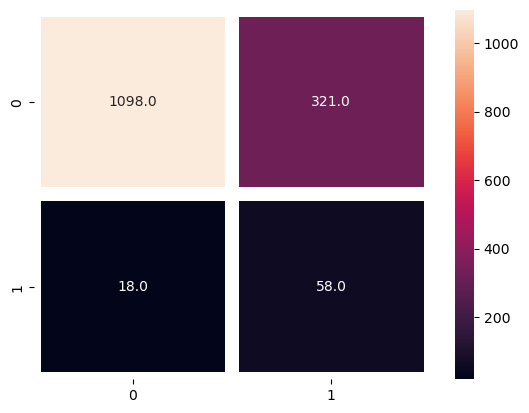

In [167]:
mt_confusion=confusion_matrix(y_true=y_test,y_pred=y_pred_bbc)
sns.heatmap(mt_confusion,annot=True,fmt=".1f",linewidth=10)
plt.show()

In [168]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier

base_estimator = AdaBoostClassifier(n_estimators=50,learning_rate=0.1,algorithm = 'SAMME')
eec = EasyEnsembleClassifier(n_estimators=50, base_estimator=base_estimator,replacement=True)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)

rusboost = RUSBoostClassifier(n_estimators=200, base_estimator=base_estimator)
rusboost.fit(X_train, y_train)
y_pred_rusboost = rusboost.predict(X_test)

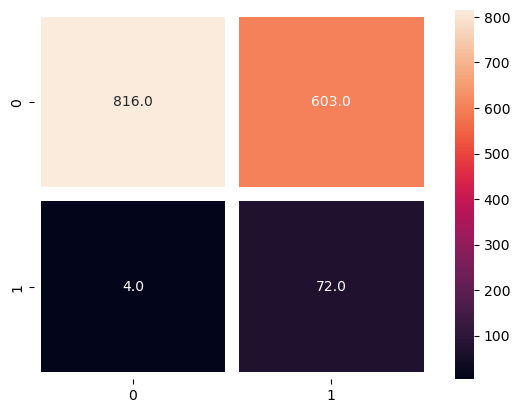

In [169]:
mt_confusion=confusion_matrix(y_true=y_test,y_pred=y_pred_eec)
sns.heatmap(mt_confusion,annot=True,fmt=".1f",linewidth=10)
plt.show()

In [131]:
import dill
filename = "EasyEnsembleClassifier_model.dill"
with open(filename, "wb") as f:
    dill.dump(eec, f)
    print(f"Finish saving models in dill")

Finish saving models in dill


In [173]:
print("Easy ensemble classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_eec):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_eec):.2f}"
)
print("RUSBoost classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rusboost):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rusboost):.2f}")

Easy ensemble classifier performance:
Balanced accuracy: 0.76 - Geometric mean 0.74
RUSBoost classifier performance:
Balanced accuracy: 0.71 - Geometric mean 0.70
